### Домашняя работа №5

Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
from sklearn.manifold import TSNE

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
data = boston.data
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
data.shape

(506, 13)

In [10]:
price = boston.target
price

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [11]:
feature_names = boston.feature_names
feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

#### Создаем датафреймы X и y:

In [12]:
X = pd.DataFrame(data, columns = boston['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
X.shape

(506, 13)

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [15]:
y = pd.DataFrame(price, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [16]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
price    506 non-null float64
dtypes: float64(1)
memory usage: 4.0 KB


#### Разбиваем данные на тренировочный и тестовый датасеты:

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

#### Масштабируем признаки с помощью StandardScaler:

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

#### Применяем t-SNE:

In [22]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [23]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 2.97641506e+01,  2.09873695e+01],
       [-4.24747753e+00, -1.05048418e+01],
       [-1.88142662e+01, -1.11759501e+01],
       [ 2.22976513e+01,  3.03626900e+01],
       [ 1.73852992e+00, -9.13341045e+00],
       [-9.11401844e+00, -1.16824980e+01],
       [-7.18314266e+00, -1.13112659e+01],
       [-2.71195641e+01, -1.09560461e+01],
       [ 2.35586834e+01,  2.98370991e+01],
       [ 2.21154327e+01,  2.70719757e+01],
       [-7.48745012e+00, -1.18326397e+01],
       [-6.44317818e+00, -3.84728122e+00],
       [-7.40933466e+00,  4.96774942e-01],
       [ 2.14254093e+01,  2.80373745e+01],
       [-9.20851231e+00,  8.65101755e-01],
       [ 6.97665644e+00, -8.96529102e+00],
       [ 4.76356819e-02, -6.78444767e+00],
       [-1.99967651e+01, -1.17451982e+01],
       [-1.69370003e+01, -4.91067171e+00],
       [-1.82409534e+01, -8.73804474e+00],
       [ 2.58343925e+01,  2.55089264e+01],
       [-1.82226837e-01, -3.70452142e+00],
       [-1.09841108e+01, -1.15292959e+01],
       [-6.

In [24]:
X_train_tsne.shape

(404, 2)

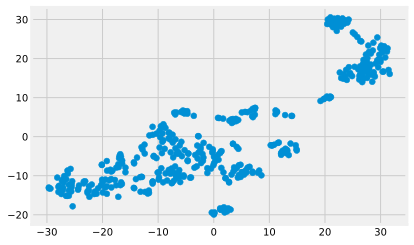

In [25]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

#### Разобьем данные на 3 кластера:

In [26]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=3)

In [28]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [29]:
pd.value_counts(labels_train)

1    191
0    128
2     85
dtype: int64

In [30]:
labels_test = kmeans.predict(X_test_scaled)

#### Построим диаграмму с помощью t-SNE и раскрасим точки разных класстеров:

Text(20, 5, 'Кластер 1')

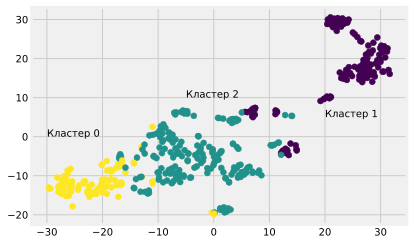

In [31]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-30, 0, 'Кластер 0')
plt.text(-5, 10, 'Кластер 2')
plt.text(20, 5, 'Кластер 1')

#### Вычислим средние значения price и CRIM в разных кластерах:

In [32]:
y_train.mean()

price    22.796535
dtype: float64

##### Для кластера 0:

In [33]:
y_train[labels_train==0].mean()

price    16.179688
dtype: float64

In [34]:
X_train.loc[labels_train==0, 'CRIM'].mean()

10.715219062500003

##### Для кластера 1:

In [35]:
y_train[labels_train==1].mean()

price    24.971204
dtype: float64

In [36]:
X_train.loc[labels_train==1, 'CRIM'].mean()

0.42098554973821983

##### Для кластера 2:

In [37]:
y_train[labels_train==2].mean()

price    27.874118
dtype: float64

In [38]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.0721184705882353

Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [39]:
kmeans_test = KMeans(n_clusters=3)

In [40]:
labels_train_test = kmeans.fit_predict(X_test_scaled)

In [41]:
pd.value_counts(labels_train_test)

1    55
0    38
2     9
dtype: int64

#### Вычислим средние значения price и CRIM в разных кластерах для тестовой выборки:

In [42]:
y_test.mean()

price    21.488235
dtype: float64

##### Для кластера 0:

In [43]:
y_test[labels_train_test==0].mean()

price    16.710526
dtype: float64

In [44]:
X_test.loc[labels_train_test==0, 'CRIM'].mean()

9.419181842105264

##### Для кластера 1:

In [45]:
y_test[labels_train_test==1].mean()

price    22.690909
dtype: float64

In [46]:
X_test.loc[labels_train_test==1, 'CRIM'].mean()

0.21929690909090907

##### Для кластера 2:

In [47]:
y_test[labels_train_test==2].mean()

price    34.311111
dtype: float64

In [48]:
X_test.loc[labels_train_test==2, 'CRIM'].mean()

0.04070333333333334